<a href="https://colab.research.google.com/github/charan-chaitanya/IMAGE-CLASIFFICATION/blob/main/Charan_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import  imread
from skimage.transform import resize

target = []
images = []
flat_data =[]

DATADIR='/content/drive/MyDrive/images'
CATEGORIES =['cats','eagle','flowers']
for i in CATEGORIES:
  class_num = CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    target.append(class_num)

In [4]:
x = flat_data
y = target

In [5]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=100)

In [6]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([24, 30, 26]))

In [7]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([12, 11, 12]))

In [8]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv =5)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [9]:
from sklearn.svm import SVC 
model = SVC(C=1)
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred = cv.predict(x_test)
y_pred

array([2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1,
       1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1])

In [11]:
y_test

[2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1]

In [12]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[ 8,  1,  1],
       [ 1,  9,  0],
       [ 3,  1, 11]])

In [13]:
accuracy_score(y_pred,y_test)

0.8

In [14]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.82      0.90      0.86        10
           2       0.92      0.73      0.81        15

    accuracy                           0.80        35
   macro avg       0.80      0.81      0.80        35
weighted avg       0.82      0.80      0.80        35



In [15]:
import pickle
pickle.dump(cv,open('img_model.p','wb'))
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
(1199, 1200, 3)
 PREDICTED OUTPUT: cats


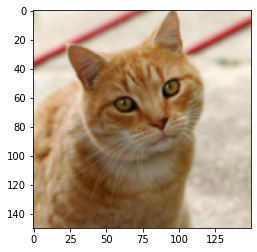

In [19]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')